In [59]:
import operator
from dateutil import parser
from datetime import datetime
import numpy as np
import re
import json
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn3
import matplotlib.cm as cm
paa_gen = ['Pflegefachassistent', 'Pflegefachhelfer', 'generalistisch', 'Pflegeassistent', 'Pflegehelfer']
paa_kh = ['Krankenpflegehelfer', 'Pflegefachhelfer:in (Krankenpflege)', 'Pflegefachhelfer*in (Krankenpflege)', 'Pflegefachhelfer/in (Krankenpflege)']
paa_ap = ['Altenpflegehelfer', 'Pflegefachhelferin (Altenpflege)', 'Pflegefachhelfer (Altenpflege)', 'Pflegefachhelfer*in (Altenpflege)', 'Pflegefachhelfer/in (Altenpflege)', 'Pflegefachhelfer:in (Altenpflege)', 'Altenpflegeassistent']
paa_gen_ugs = ['Pflegekr', 'Pflegehilfskr', 'Pflegeservicekr']
paa_kh_ugs = ['Krankenpflegekr', 'Krankenpflegeassistent', 'Krankenpflegefachassistent', 'Krankenpflegefachhelfer', 'Krankenpflegehilfskr']
paa_ap_ugs = ['Altenpflegekr', 'Altenpflegefachassistent', 'Altenpflegefachhelfer', 'Altenpflegehilfskr']
paa_zweiteiler_prefix = ['Helfer', 'Hilfskr']
paa_zweiteiler_gen = ['Pflege'] #wenn hier was anderes dazu kommt, muss str.contains() angepasst werden (regex)
paa_zweiteiler_ap = ['Altenpflege', 'Ambulant']
paa_zweiteiler_kh = ['Altenpflege', 'Ambulant', 'Krankenhaus', 'Station']
years = [ '2020', '2021', '2022', '2023']
path = '/Users/jan/Documents/Promotion/BIBB GW/AddOn_PAA/paa/'

count_all_gen = []
count_all_kh = []
count_all_ap = []
count_all_in_year = []
for year in years:
    with open(f"{path}paa_{year}.json", 'r') as file:
        output = json.load(file)
    sorted_output = sorted(output, key=lambda x: x["date"])
    df_full = pd.DataFrame({
        "date": [entry["date"] for entry in sorted_output],
        "job_title": [entry["job_title"] for entry in sorted_output],
        "via_intermediary": [entry["via_intermediary"] for entry in sorted_output],
    })
    df_full = df_full[df_full["via_intermediary"] != True]
    df_full['gen'] = pd.NA
    df_full['kh'] = pd.NA
    df_full['ap'] = pd.NA
    for i in range(len(paa_gen)):
        result = df_full['job_title'].str.contains(rf'(?<![a-zA-Z]){re.escape(paa_gen[i])}(?![a-zA-Z])', case=False, na=False)
        df_full.loc[result, 'gen'] = 1
    for i in range(len(paa_kh)):
        result = df_full['job_title'].str.contains(rf'(?<![a-zA-Z]){re.escape(paa_kh[i])}(?![a-zA-Z])', case=False, na=False)
        df_full.loc[result, 'kh'] = 1
    for i in range(len(paa_ap)):
        result = df_full['job_title'].str.contains(rf'(?<![a-zA-Z]){re.escape(paa_ap[i])}(?![a-zA-Z])', case=False, na=False)
        df_full.loc[result, 'ap'] = 1
    '''for i in range(len(paa_zweiteiler_gen)):
        for h in range(len(paa_zweiteiler_prefix)):
            esult = df_full['job_title'].str.contains(rf'(?<![a-zA-Z]){re.escape(paa_zweiteiler_gen[i])}(?![a-zA-Z])', case=False, na=False) & df_full['job_title'].str.contains(paa_zweiteiler_prefix[h], case=False, na=False, regex=False)
            df_full.loc[result, 'gen'] = 1
    for i in range(len(paa_zweiteiler_ap)):
        for h in range(len(paa_zweiteiler_prefix)):
            result = df_full['job_title'].str.contains(paa_zweiteiler_ap[i], case=False, na=False, regex=False) & df_full['job_title'].str.contains(paa_zweiteiler_prefix[h], case=False, na=False, regex=False)
            df_full.loc[result, 'ap'] = 1
    for i in range(len(paa_zweiteiler_kh)):
        for h in range(len(paa_zweiteiler_prefix)):
            result = df_full['job_title'].str.contains(paa_zweiteiler_kh[i], case=False, na=False, regex=False) & df_full['job_title'].str.contains(paa_zweiteiler_prefix[h], case=False, na=False, regex=False)
            df_full.loc[result, 'kh'] = 1'''
    condition = df_full['gen'].isna() & df_full['kh'].isna() & df_full['ap'].isna()
    df_full = df_full.drop(df_full[condition].index)
    count_all_gen.append((df_full['gen'] == 1).sum())
    count_all_kh.append((df_full['kh'] == 1).sum())
    count_all_ap.append((df_full['ap'] == 1).sum())
    count_all_in_year.append(len(df_full))
    print(f"Jahr {year} abgeschlossen, insg. {count_all_in_year[-1]} Stellenanzeigen:")
    print(f"{count_all_gen[-1]} Stellenanzeigen mit generalistischen Berufsbezeichnungen")
    print(f"{count_all_kh[-1]} Stellenanzeigen mit KH-Berufsbezeichnungen")
    print(f"{count_all_ap[-1]} Stellenanzeigen mit AP-Berufsbezeichnungen\n\n")
    del df_full

Jahr 2020 abgeschlossen, insg. 7179 Stellenanzeigen:
6267 Stellenanzeigen mit generalistischen Berufsbezeichnungen
722 Stellenanzeigen mit KH-Berufsbezeichnungen
242 Stellenanzeigen mit AP-Berufsbezeichnungen


Jahr 2021 abgeschlossen, insg. 11605 Stellenanzeigen:
10210 Stellenanzeigen mit generalistischen Berufsbezeichnungen
920 Stellenanzeigen mit KH-Berufsbezeichnungen
730 Stellenanzeigen mit AP-Berufsbezeichnungen


Jahr 2022 abgeschlossen, insg. 19645 Stellenanzeigen:
13094 Stellenanzeigen mit generalistischen Berufsbezeichnungen
2215 Stellenanzeigen mit KH-Berufsbezeichnungen
4968 Stellenanzeigen mit AP-Berufsbezeichnungen


Jahr 2023 abgeschlossen, insg. 25315 Stellenanzeigen:
15977 Stellenanzeigen mit generalistischen Berufsbezeichnungen
3050 Stellenanzeigen mit KH-Berufsbezeichnungen
6912 Stellenanzeigen mit AP-Berufsbezeichnungen




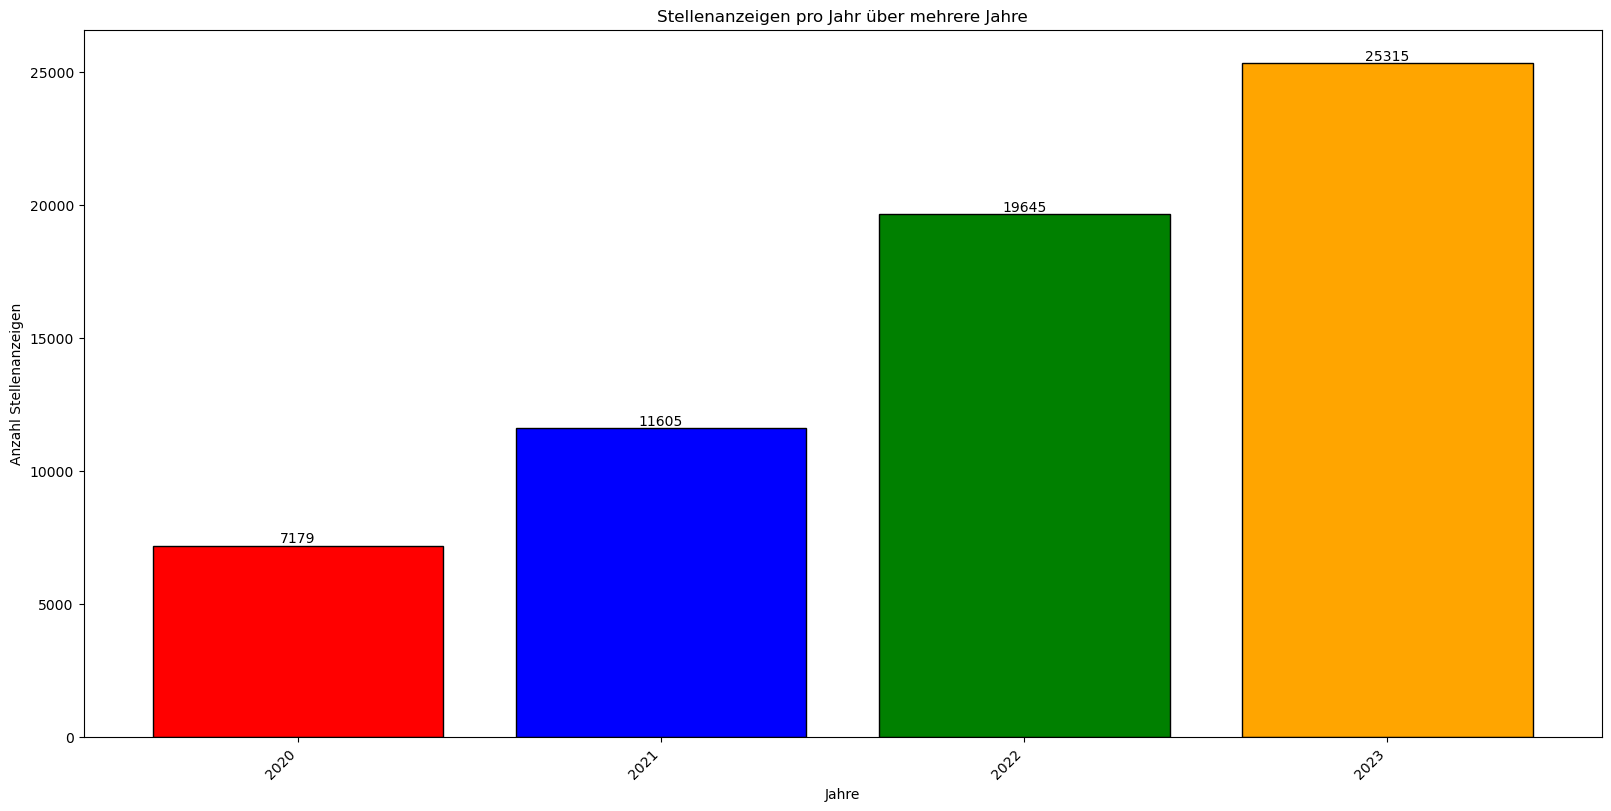

In [60]:
bar_colors = ["red", "blue", "green", "orange", "purple", "cyan", "brown", "pink", "lime", "yellow"]
xyears = np.arange(len(years))
fig, ax = plt.subplots(figsize=(16, 8), constrained_layout=True)
bartwo = ax.bar(xyears, count_all_in_year, color=bar_colors, edgecolor='black')
for rect in bartwo:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 0.5, str(height), 
            ha='center', va='bottom')
ax.set_xticks(xyears)
ax.set_xticklabels(years, rotation=45, ha='right')
ax.set_xlabel('Jahre')
ax.set_ylabel('Anzahl Stellenanzeigen')
ax.set_title('Stellenanzeigen pro Jahr über mehrere Jahre')
plt.show()

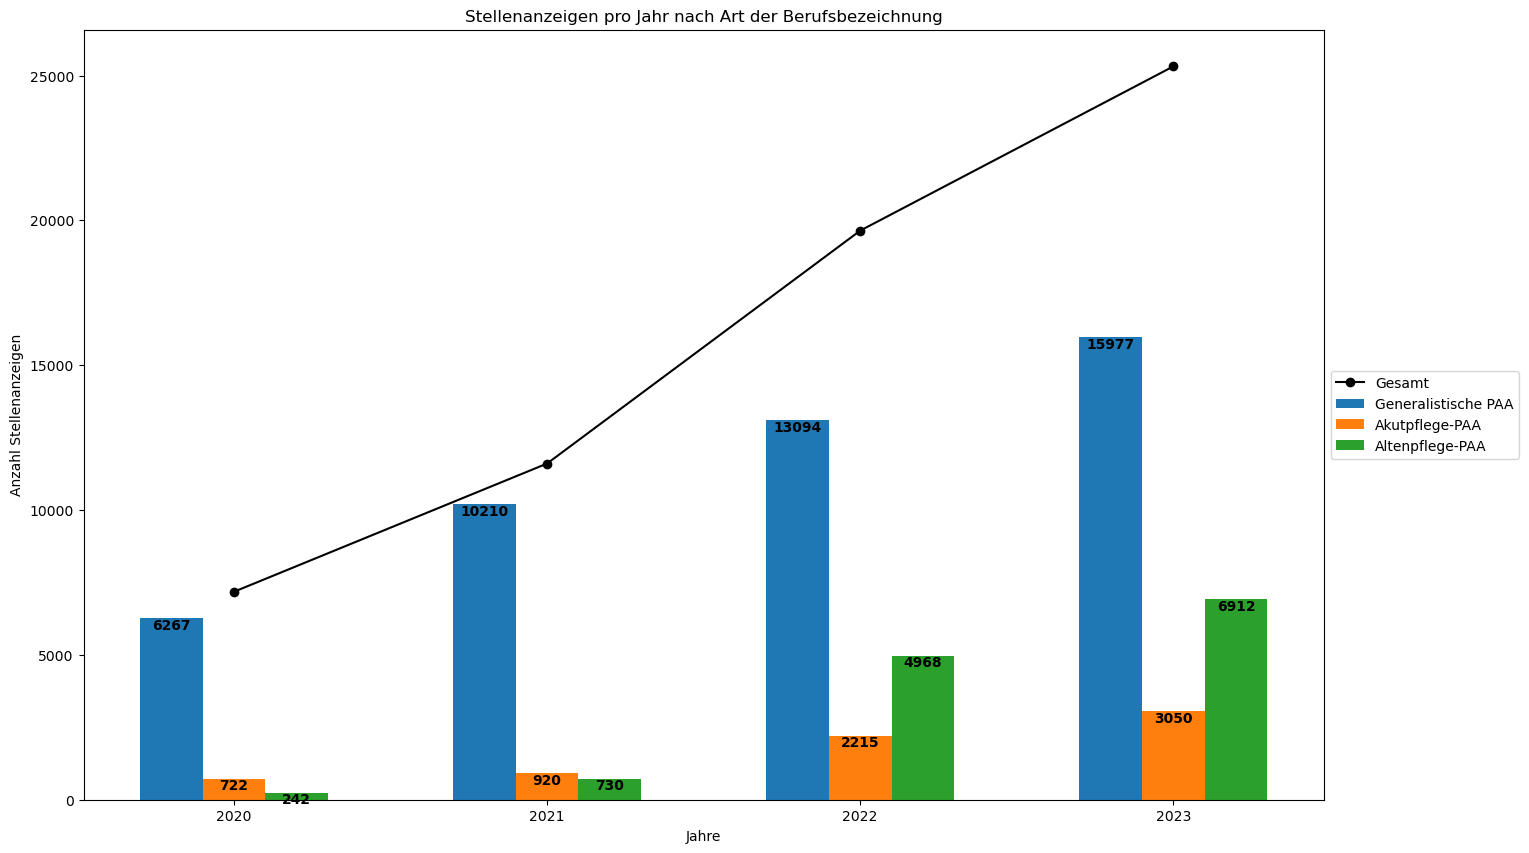

In [61]:
bar_colors = ["blue", "red", "green"]
width = 0.2
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
rects1 = ax.bar(xyears - 1*width, count_all_gen, width, label='Generalistische PAA')
rects2 = ax.bar(xyears, count_all_kh, width, label='Akutpflege-PAA')
rects3 = ax.bar(xyears + 1*width, count_all_ap, width, label='Altenpflege-PAA')
ax.plot(xyears, count_all_in_year, marker='o', color='black', label='Gesamt')
def add_bar_labels(rect_base):
    for rect in rect_base:
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, 
            height - 0.5,
            str(int(height)), 
            ha='center', va='top', color='black', fontsize=10, fontweight='bold'
        )
add_bar_labels(rects1)
add_bar_labels(rects2)
add_bar_labels(rects3)
ax.set_xlabel('Jahre')
ax.set_ylabel('Anzahl Stellenanzeigen')
ax.set_title('Stellenanzeigen pro Jahr nach Art der Berufsbezeichnung')
ax.set_xticks(xyears)
ax.set_xticklabels(years)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
handles, labels = ax.get_legend_handles_labels()
order = [0, 1, 2, 3]
handles = [handles[i] for i in order]
labels = [labels[i] for i in order]
ax.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

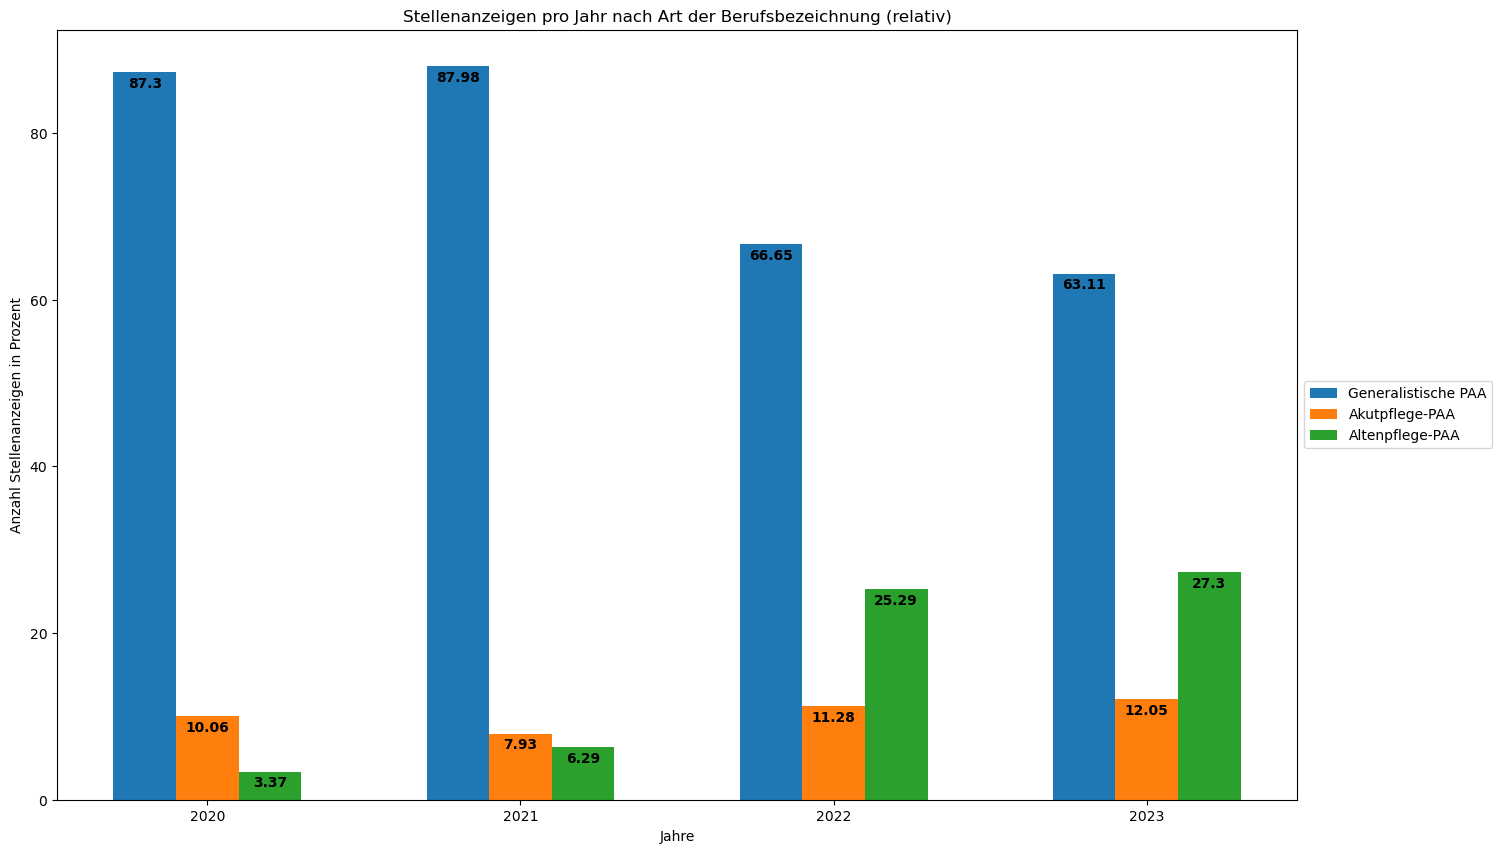

In [62]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
percent_gen = np.array(count_all_gen) / np.array(count_all_in_year) * 100
percent_kh = np.array(count_all_kh) / np.array(count_all_in_year) * 100
percent_ap = np.array(count_all_ap) / np.array(count_all_in_year) * 100
rects1 = ax.bar(xyears - 1*width, percent_gen, width, label='Generalistische PAA')
rects2 = ax.bar(xyears, percent_kh, width, label='Akutpflege-PAA')
rects3 = ax.bar(xyears + 1*width, percent_ap, width, label='Altenpflege-PAA')
def add_bar_labels(rect_base):
    for rect in rect_base:
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, 
            height - 0.5,
            str(round(height, 2)),
            ha='center', va='top', color='black', fontsize=10, fontweight='bold'
        )
add_bar_labels(rects1)
add_bar_labels(rects2)
add_bar_labels(rects3)
ax.set_xlabel('Jahre')
ax.set_ylabel('Anzahl Stellenanzeigen in Prozent')
ax.set_title('Stellenanzeigen pro Jahr nach Art der Berufsbezeichnung (relativ)')
ax.set_xticks(xyears)
ax.set_xticklabels(years)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
handles, labels = ax.get_legend_handles_labels()
order = [0, 1, 2]
handles = [handles[i] for i in order]
labels = [labels[i] for i in order]
ax.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()